# Import Packages


In [55]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np
import time

# Parameters


In [56]:
population_size = 100
gene_length = 4
num_generations = 50

# Initialize quantum circuit and classical register

In [57]:
qc = QuantumCircuit(gene_length, gene_length)

# Example fitness function


In [58]:
def fitness_function(individual):
    return sum(individual)

# Quantum Genetic Algorithm

In [59]:
# Timer start
start_time = time.time()

for generation in range(generation_max):
    print(f"= GENERATION: {generation} =")

    # Reset quantum circuit
    qc.reset(range(gene_length))

    # Randomize initial states using Hadamard gate
    for qubit in range(gene_length):
        if np.random.rand() < 0.5:
            qc.h(qubit)  # Apply Hadamard gate with 50% probability

    # Measure and evaluate fitness
    qc.measure(range(gene_length), range(gene_length))
    sim = Aer.get_backend("qasm_simulator")
    result = sim.run(transpile(qc, sim)).result()
    counts = result.get_counts()

    fitness_values = {
        binary_string: fitness_function([int(bit) for bit in binary_string])
        for binary_string in counts.keys()
    }
    # Select top N individuals based on fitness
    selected_strings = sorted(
        fitness_values.keys(), key=lambda x: fitness_values[x], reverse=True
    )[:N]

    # Update quantum circuit for selected individuals
    qc.reset(range(gene_length))
    for binary_string in selected_strings:
        for idx, bit in enumerate(binary_string):
            if bit == "1":
                qc.x(idx)  # Apply X-gate for '1' bits
        qc.h(range(gene_length))  # Apply Hadamard gate for randomization

    print("Selected Individuals:")
    for binary_string in selected_strings:
        print(
            "Binary String:", binary_string, "Fitness:", fitness_values[binary_string]
        )

# Timer end
end_time = time.time()

= GENERATION: 0 =
Selected Individuals:
Binary String: 0101 Fitness: 2
Binary String: 0100 Fitness: 1
Binary String: 0001 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 1 =
Selected Individuals:
Binary String: 0101 Fitness: 2
Binary String: 0100 Fitness: 1
Binary String: 0001 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 2 =
Selected Individuals:
Binary String: 0001 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 3 =
Selected Individuals:
Binary String: 0110 Fitness: 2
Binary String: 0010 Fitness: 1
Binary String: 0100 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 4 =


Selected Individuals:
Binary String: 0100 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 5 =
Selected Individuals:
Binary String: 0010 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 6 =
Selected Individuals:
Binary String: 0001 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 7 =
Selected Individuals:
Binary String: 1000 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 8 =
Selected Individuals:
Binary String: 0001 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 9 =
Selected Individuals:
Binary String: 1110 Fitness: 3
Binary String: 1010 Fitness: 2
Binary String: 0110 Fitness: 2
Binary String: 1100 Fitness: 2
Binary String: 0100 Fitness: 1
Binary String: 1000 Fitness: 1
Binary String: 0010 Fitness: 1
Binary String: 0000 Fitness: 0
= GENERATION: 10 =
Selected Individuals:
Binary String: 1111 Fitness: 4
Binary String: 1110 Fitness: 3
Binary String: 1101 Fitness: 3
Binary String: 1011 Fitness: 3
Binary String: 0111 Fitness: 3
Binary String: 0110 Fitn

# Execution time

In [60]:
elapsed_time = end_time - start_time
print(f"Quantum Genetic Algorithm finished in {elapsed_time:.2f} seconds.")

Quantum Genetic Algorithm finished in 6.90 seconds.


# Execute the final circuit

In [61]:
qc.measure(range(gene_length), range(gene_length))
simulator = Aer.get_backend("qasm_simulator")
compiled_qc = transpile(qc, simulator)
qobj = assemble(compiled_qc)
result = simulator.run(qobj).result()
counts = result.get_counts()

/tmp/ipykernel_61863/1242949048.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


# Plot the result

Final Results:
{'0010': 1024}


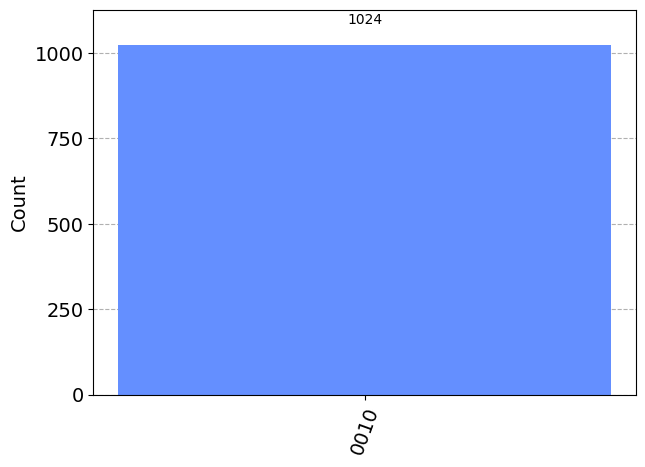

In [62]:
print("Final Results:")
print(counts)
plot_histogram(counts)